In [3]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D
import os

%matplotlib inline
np.random.seed(12)

In [4]:
data_dir = pathlib.Path('s82j8dh4rr-1')
train = 's82j8dh4rr-1'

In [5]:
dataset_path_dir = os.listdir(data_dir)
print(dataset_path_dir)
print('Label : ', len(dataset_path_dir))

['Belimbing Wuluh', 'Jambu Biji', 'Kemangi', 'Seledri', 'Sirih', 'Lidah Buaya', 'Jeruk Nipis', 'Nangka', 'Pepaya', 'Pandan']
Label :  10


In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Image Count : ', image_count)

Image Count :  3500


In [7]:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
train_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width),
                                        validation_split=0.2, subset='training')

Found 3500 files belonging to 10 classes.
Using 2800 files for training.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-01-27 11:03:56.189596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-27 11:03:56.190305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
val_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width),
                                        validation_split=0.2, subset='validation')

Found 3500 files belonging to 10 classes.
Using 700 files for validation.


In [10]:
test_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width),
                                        validation_split=None)

Found 3500 files belonging to 10 classes.


In [11]:
for image_batch, labels_batch in train_data.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

2023-01-27 11:03:56.615217: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(32, 224, 224, 3)
(32,)


In [12]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))

In [13]:
model.compile(optimizer='adam',
            loss=SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 112, 112, 32)      0         
                                                        

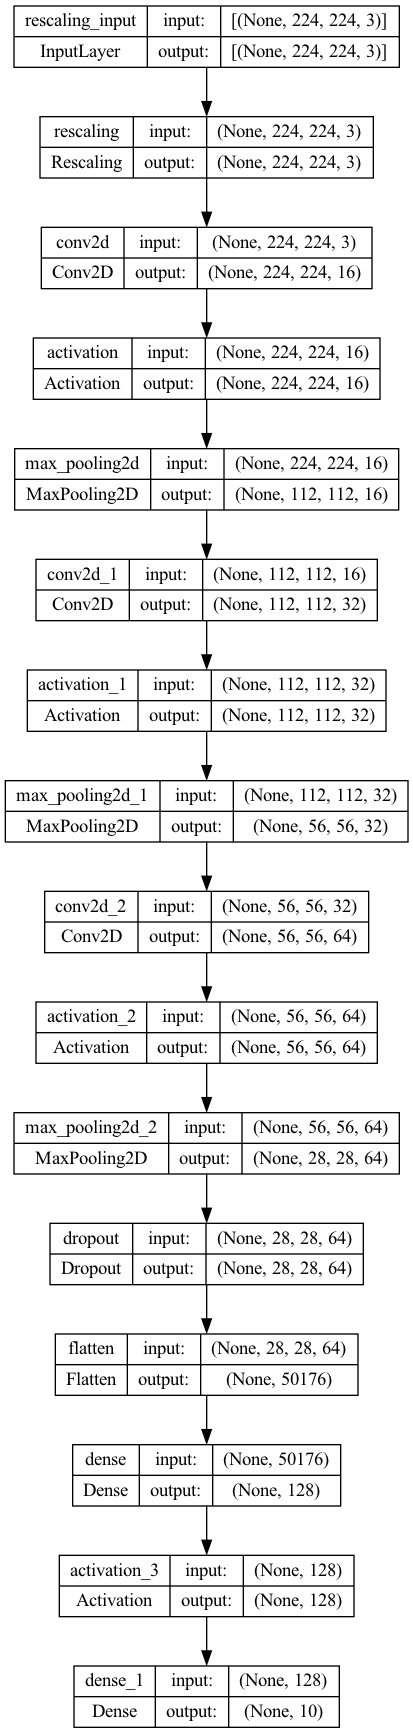

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [16]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10


2023-01-27 11:03:58.253637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - ETA: 0s - loss: 1.9201 - accuracy: 0.3664

2023-01-27 11:04:10.762519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


88/88 [==============================] - 14s 153ms/step - loss: 1.9201 - accuracy: 0.3664 - val_loss: 1.2569 - val_accuracy: 0.5700
Epoch 2/10
88/88 [==============================] - 14s 155ms/step - loss: 1.0901 - accuracy: 0.6218 - val_loss: 1.0826 - val_accuracy: 0.6529
Epoch 3/10
88/88 [==============================] - 14s 153ms/step - loss: 0.8171 - accuracy: 0.7207 - val_loss: 0.8151 - val_accuracy: 0.7614
Epoch 4/10
88/88 [==============================] - 14s 152ms/step - loss: 0.5384 - accuracy: 0.8121 - val_loss: 0.6843 - val_accuracy: 0.8071
Epoch 5/10
88/88 [==============================] - 14s 152ms/step - loss: 0.3547 - accuracy: 0.8811 - val_loss: 0.6667 - val_accuracy: 0.8114
Epoch 6/10
88/88 [==============================] - 14s 154ms/step - loss: 0.2424 - accuracy: 0.9211 - val_loss: 0.7266 - val_accuracy: 0.7871
Epoch 7/10
88/88 [==============================] - 15s 160ms/step - loss: 0.1726 - accuracy: 0.9468 - val_loss: 0.6513 - val_accuracy: 0.8214
Epoch 8/10

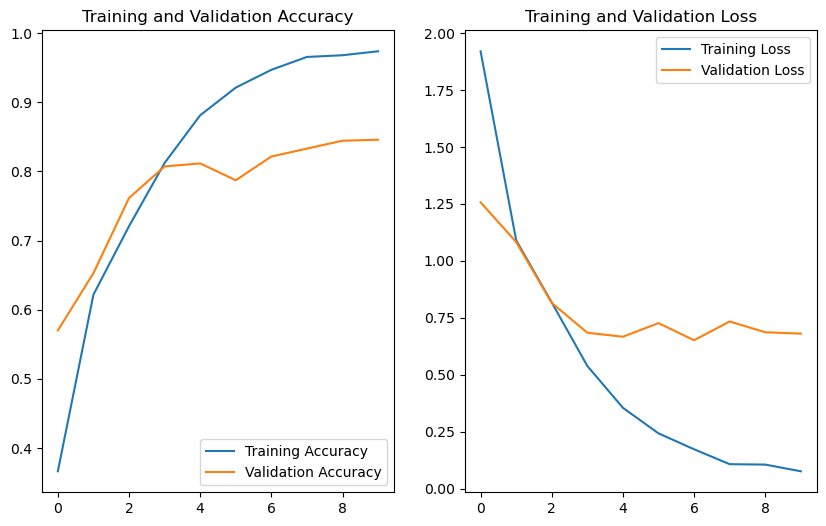

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
performance = model.evaluate(val_data)

22/22 [==============================] - 2s 62ms/step - loss: 0.6804 - accuracy: 0.8457


actual label: Lidah Buaya
1/1 [==============================] - 0s 85ms/step
predicted label: Lidah Buaya


2023-01-27 11:06:23.867013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


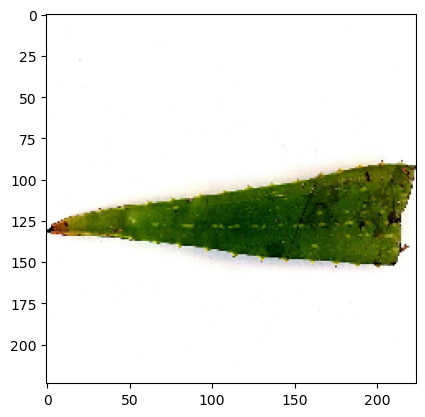

In [19]:
labels = train_data.class_names
labels
for images_batch, labels_batch in test_data.take(1):
    
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    plt.imshow(image)
    print("actual label:", labels[label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

In [20]:
from tensorflow import expand_dims

def predict(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 10ms/step


2023-01-27 11:06:24.773659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 10ms/step


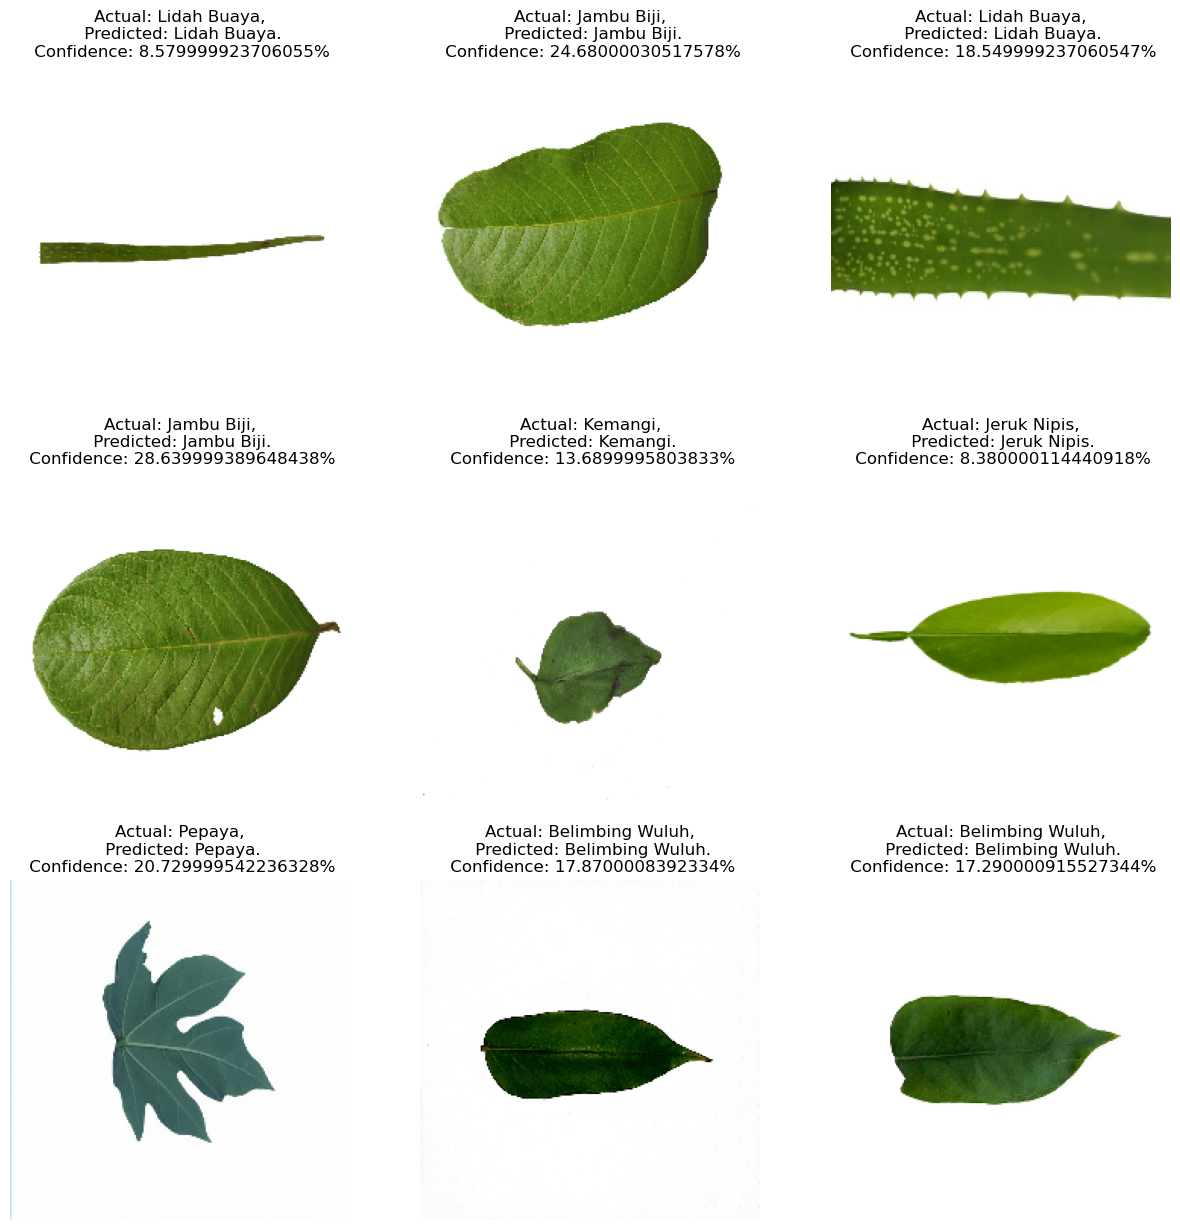

In [21]:
plt.figure(figsize=(15, 15))

for images, lbs in val_data.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [33]:
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

BATCH_SIZE = 64

train_generator = ImageDataGenerator(rotation_range=90, 
                                    brightness_range=[0.1, 0.7],
                                    width_shift_range=0.5, 
                                    height_shift_range=0.5,
                                    horizontal_flip=True, 
                                    vertical_flip=True,
                                    validation_split=0.15,
                                    preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing

In [44]:
traingen = train_generator.flow_from_directory(data_dir,
                                            target_size=(224, 224),
                                            class_mode='categorical',
                                            classes=sorted(os.listdir(data_dir)),
                                            subset='training',
                                            batch_size=BATCH_SIZE, 
                                            shuffle=True,
                                            seed=42)

validgen = train_generator.flow_from_directory(data_dir,
                                            target_size=(224, 224),
                                            class_mode='categorical',
                                            classes=sorted(os.listdir(data_dir)),
                                            subset='validation',
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            seed=42)

testgen = test_generator.flow_from_directory(data_dir,
                                            target_size=(224, 224),
                                            class_mode=None,
                                            classes=sorted(os.listdir(data_dir)),
                                            batch_size=1,
                                            shuffle=False,
                                            seed=42)

Found 2980 images belonging to 10 classes.
Found 520 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


In [45]:
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                    weights='imagenet', 
                    input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return model

In [53]:
BATCH_SIZE = 64
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes = 10

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 10

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=2)

In [54]:
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                save_best_only=True,
                                verbose=1)

early_stop = EarlyStopping(monitor='val_loss',
                        patience=10,
                        restore_best_weights=True,
                        mode='min')


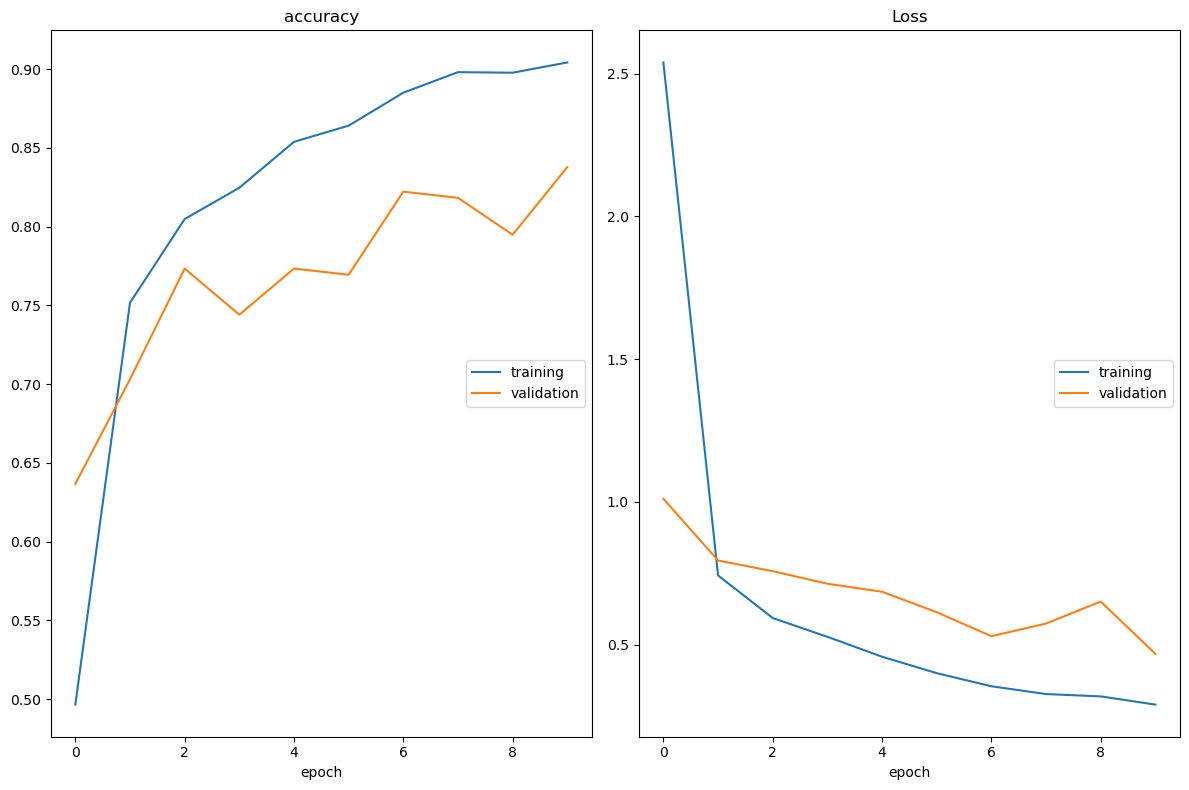

accuracy
	training         	 (min:    0.497, max:    0.904, cur:    0.904)
	validation       	 (min:    0.637, max:    0.838, cur:    0.838)
Loss
	training         	 (min:    0.291, max:    2.539, cur:    0.291)
	validation       	 (min:    0.468, max:    1.011, cur:    0.468)
46/46 [==============================] - 100s 2s/step - loss: 0.2906 - accuracy: 0.9043 - val_loss: 0.4683 - val_accuracy: 0.8379


In [55]:

vgg_history = vgg_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [57]:
from sklearn.metrics import accuracy_score

true_classes = testgen.classes
vgg_preds = vgg_model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)
vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy with Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

3500/3500 [==============================] - 108s 31ms/step
VGG16 Model Accuracy with Fine-Tuning: 94.17%


1/1 [==============================] - 0s 12ms/step


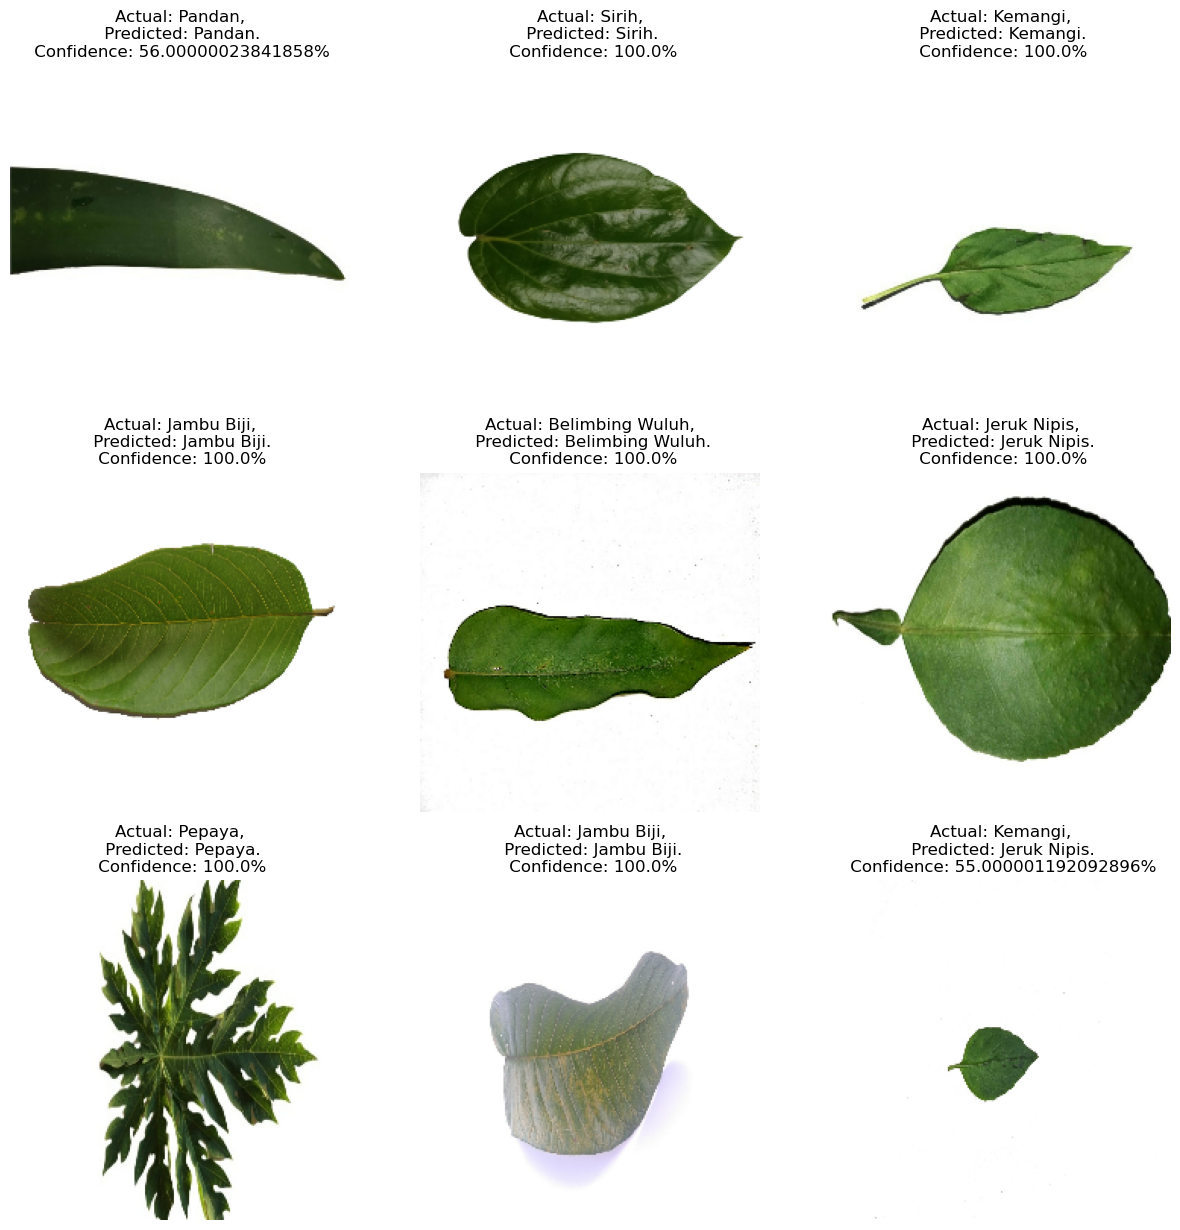

In [65]:
plt.figure(figsize=(15, 15))

for images, lbs in val_data.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(vgg_model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence*100}%")
        
        plt.axis("off")

In [ ]:
model.save('model-CNN.h5')